<figure>
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
    <img src="../imagenes/Foto Alvaro Montenegro.png" width="40" height="40" align="right" /> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Simposio Internacional de Estadística 2024</center></span>

## 

## <span style="color:green"><center>Minicurso de Inteligencia Artificial Moderna - Sesión II<center></span>

### <span style="color:green"><center>Modelos de Visión<center></span>

<figure>
<center>
<img src="../Imagenes/ImageNet-0000000008-f2e87edd_Y0fT5zg.jpg" width="600" height="500" align="center"/>
<figcaption>ImageNet, 2012</figcaption>
</center>
</figure>

Fuente:<a href="https://cs.stanford.edu/people/karpathy/cnnembed/">t-SNE visualization of CNN codes

# <span style="color:#4361EE">Profesor</span>

## <span style="color:#4361EE">Alvaro  Mauricio Montenegro Díaz, Ph.D.</span>

# <span style="color:#4361EE">Contenido</span>

* [¿Qué es una Convolución?](#¿Qué-es-una-Convolución?)
* [Convoluciones en el Procesamiento de Imágenes](#Convoluciones-en-el-Procesamiento-de-Imágenes)
* [Redes convolucionales](#Redes_convolucionales)
* [Arquitectura Resnet](#Arquitectura_Resnet)
* [Redes Profundas Modernas. Modelos Preentrenados](#Redes-Profundas-Modernas.-Modelos-Preentrenados)
* [Transferencia de conocimiento](#Transferencia-de-conocimiento)
* [Interpretabilidad](#Interpretabilidad)

# 

## <span style="color:blue">¿Qué es una Convolución?  </span>

<figure>
<center>
<img src="../Imagenes/nave_laser.png"  width="500" height="500" align="center"/> 
</center>
</figure>

Fuente [Nasa](https://www.nasa.gov/sites/default/files/thumbnails/image/untitled-1-04.png)

Vamos a usar un ejemplo hipotético para introducir el concepto matemático de convolución. Supongamos que estamos rastreando la ubicación de una nave espacial con un sensor láser. Nuestro sensor láser proporciona una salida única $ x (t) $, la posición de la nave espacial en el momento $ t $. Tanto $ x $ como $ t $ tienen un valor real, es decir, podemos obtener una lectura diferente del láser sensor en cualquier instante en el tiempo.

Ahora suponga que nuestro sensor láser es algo ruidoso. Para obtener una estimación menos ruidosa de la posición de la nave espacial, una buena idea es promediar varias mediciones. Por supuesto, las mediciones más recientes son más relevantes, por lo que lo haremos un promedio ponderado que otorgue más peso a las mediciones recientes.

Podemos construir tal promedio ponderado con una función de ponderación $ w (a) $, donde $ a $ es la edad de una medición. Si aplicamos una operación promedio ponderada en cada momento, obtenemos una nueva función que proporciona una estimación suavizada de la posición $s$ de la nave espacial:

$$
s(t) = \int x(a) w(t-a)da
$$

Observe que si $a_1.\ldots, a_n$ es una muestra de la distribución cuya función de densidad es $w$, entonces se tiene que

$$
s(t)\approx \tfrac{1}{n}\sum_{i=1}^n x(a_i) w(t-a_i)
$$

Esta operación se llama convolución. La operación de convolución es típicamente denotada con un asterisco:

$$
s(t) = (x ∗ w)(t)
$$
En el ejemplo, $ w $ debe ser una función de densidad de probabilidad válida, o el el resultado no es un promedio ponderado.

Sin embargo, podemos hacer convoluciones con funciones más generales. La fórmula matemática de la convolución de dos funciones es

$$
(f * h)(t)=\int_{-\infty}^{\infty}f(\tau)h(t-\tau)d\tau
$$

Y se puede usar para, por ejemplo, suavizar bordes de diferentes señales, como vemos a continuación:

<figure>
<center>
<img src="../Imagenes/main-qimg-58b5ef2bc0b48afeea246bf0058bf1bb.webp"  width="600" height="600" align="center"/>
</center>
</figure>

Fuente: [What is the phyical significance of convolution?](https://www.quora.com/What-is-the-physical-significance-of-convolution)

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Convoluciones en el Procesamiento de Imágenes</span>

Las convoluciones son muy útiles en la ciencia y la ingeniería y se pueden consultar algunas de ellas[aqui].(https://en.wikipedia.org/wiki/Convolution#Applications). 

Tal vez, una de las aplicaciones más usadas en el **Aprendizaje de Máquina**, es su uso sobre imágenes y en series de tiempo.


Recordemos que una imagen es un tensor, el cual en algunos casos se puede visualizar por completo. La siguiente ilustración se  muestra la forma como se calcula la convolucion de una imagen blanco y negro de tamaño $6\times 6$ con un kernel de tamaño $3\times 3$. Observe detenidamente la imagen. La imagen convolucionada tiene tamaño $4\times 4$. ¿Porque?

<figure>
<img src="../Imagenes/1_32zCSTBi3giSApz1oQV-zA.gif"  width="500" height="500" align="left"/> 
    
<img src="../Imagenes/copia-8.png"  width="500" height="500" align="right"/>   
</figure>

Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Ejemplos de convolución de imágenes</span>

In [ ]:
Para ilustrar el resultado de la convulación de una imagen con diferentes kernels, vamos a considerar los siguientes kerneles.

In [52]:
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]])


kernel=np.array([[1,2,1],
                [0,0,0],
                [-1,-2,-1]])

kernel2=np.array([[1,0,-1],
                  [1,0,-1],
                  [1,0,-1]])

kernel3=np.array([[0.5, 0.0, 0.2],
                  [0.0, -0.5, 0.0],
                  [1.0, -1.0, 0.5]])


Hemos tomado la imagen del castillo. Por facilidad se ha transformado la imagen a tonos de grises (blanco y negro). Estas dos imagnes corresponden a la línea  superior del panel de imágenes. Luego se presenta la convolución de la imagen blanco y negro con cada uno d elos kerneles, en le respectivo orden. De nuevo  observe detenidamente las imágenes.

<figure>
<center>
<img src="../Imagenes/castillo_3.png"  width="1200" height="800" align="center"/>
</center>
</figure>

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Relleno (Padding)</span>

Al hacer el proceso de convolución, se generan cierta **pérdida de información** debida a las esquinas de la imagen. Recuerde de arriba que la imagen cambió de tamaño.

De hecho, la imagen convolucionada sufre un cambio de dimensión a la baja.



Para arreglar dicho problema, podemos por ejemplo, agregar una **frontera extra de ceros** al borde la imagen.

Dicho proceso es conocido como relleno de ceros o **zero-padding**.

<figure>
<center>
<img src="../Imagenes/padding.webp"  width="600" height="600" align="center"/>
</center>
</figure>

Fuente: [Baeldung](https://www.baeldung.com/cs/deep-neural-networks-padding)

En el lenguaje de convoluciones, usualmente se usan dos modos:

- **Valid:** Regresa la imagen con el kernel convolucionado sin cambios (reduce dimensión de salida).
- **Same:** Regresa la imagen con el mismo tamaño que la imagen original.

En el caso de hacer padding y usar **same**, el padding debe cumplir la siguiente ecuación:

$$p=\frac{f-1}{2}$$

donde $p$ es el tamaño de relleno (padding) y $f$ es la dimensión del kernel.

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Saltos (Strides) </span>

En algunos casos, no queremos tantos detalles sobre la convolución (por ejemplo, si no hay tantos detalles de pixel en pixel). Por ejemplo en imágenes en donde los colores van cambiando muy poco de pixel a pixel. En estos casos, es grato que podemos tener en nuestras redes convolucionadas el parámetro de **salto ó stride**. En la ilustración se tiene stride=1. Observe que la imagen original tiene tamaño $7\times 7$ con un kernel de tamaño $3\times 3$ y la imagen transformada tiene tamaño $3\times 3$, por efecto del stride.

<figure>
<center>
<img src="../Imagenes/1_itcofCIVsGe7rBmciJcmVw.gif"  width="800" height="600" align="center"/>
</center>
</figure>

Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

En este caso, la fórmula asociada a la dimensión de salida es:


$$n_{out}=\text{floor}\biggl({\frac{n_{in}+2p-f}{s}+1}\biggr)$$

en donde $s$ es el tamaño del salto(stride).

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Filtros</span>

**¿Qué hacemos cuando tenemos una imagen a color?**

Como hemos visto hasta ahora, los kernels 2D se aplican a imágenes 2D, que por convención, están representadas por tensores bidimensionales de un canal de color. Pero ¿Qué ocurre si el tensor de entrada es 3D?. Es decir, tenemos imágenes 2D con tres canales de color. Este es el caso de por ejemplo, si el tensor de entrada representa a una imagen en formato RGB.

El problema puede plantarse de manera más general en realidad. Supongamos que tenemos tensores de entrada 3D, en donde la tercera dimensión representan diferentes canales, digamos 256 canales.

El truco que usaremos se llama `filtro`. Lo que vamos a hacer es usar un kernel 2D por cada canal. Entonces, si se tienen 3 canales, usaremos 3 kernels 2D, uno por cada canal. Si tenemos 256 canales, usaremos 256 kernels 2D. Supongamos que en general tenemos  *d* canales. El conjunto de los *d* kernels 2D que se aplicaran al tensor de tamaño $h*k*d$ se denomina un filtro 2D. Revise detenidamente la siguiente imagen.

<figure>
<center>
<img src="../Imagenes/mapa_convolucion.png"  width="800" height="600" align="center"/>
</center>
</figure>

Fuente: Alvaro Montenegro

Como puede darse cuenta, sucede los siguiente:

1. El tensor de entrada es de tamaño 4x4x3, el cual se puede interpretar como una imagen de tamaño 4x4 a color, con 3 canales de color.
1. EL filtro tiene tamaño 2x2x3, que corresponde a 3 kernels de tamaño 2x2.
1. Cada kernel se aplica a un canal diferente. Por ejemplo el kernel 1 se aplica al cnal 1, haciendo la respectiva convolución. Esta convolución  da origen a un mapa de características (features). de tamaño 3x3. Entonces le filtro completo produce un tensor de tamaño 3x3x3, que corresponde a tres mapas de características, cada una de de tamaño 3x3 .
1. Finalmente, los mapas de características se suman componente a componente dando origen al resultado definitivo de la convolución que es un tensor de tamaño 3x3x1.

## <span style="color:blue"> Múltiples filtros </span>

Ahora vemos la acción de varios filtros sobre la misma imagen. El tensor original tiene tamaño 6*6*3 y cada filtro es un tensor de tamaño 3x3x3. En consecuencia Cada filtro da origen a un canal de tamaño 4*4*1, se explicó arriba. 

Observe que como son tres filtros, y como cada filtro da origen a un cana, la aplicación de los tres filtros da como resultado un tensor de tamaño 4x4x3, es decir imágenes de tamaño 4x4 y tres canales.

Como puede imaginar, a la salida de una capa convolucional 2D, se tienen imágenes en varios canales. Por lo que es posible ver tales imágenes por cada canal. Haremos esto en la próxima lección.

<figure>
<center>
<img src="../Imagenes/1_Ukb2msCjU3G5eS4a45f-lg.png"  width="800" height="600" align="center"/>
</center>
</figure>

Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

En este caso, el resultado final de la convolución se conoce como **filtro**. Note que en realidad se hicieron tres convoluciones.

Note que a pesar de ser una operación entre tensores de dimensión 3, el resultado es un tensor de dimensión 2.

La fórmula que explica las dimensiones de salida es:

$$[n,n,n_c]*[f,f,n_c]=\biggl[\text{floor}\biggl({\frac{n+2p-f}{s}+1}\biggr),\text{floor}\biggl({\frac{n+2p-f}{s}+1}\biggr),n_f\biggr]$$

## <span style="color:blue">Reducción en el número de parámetros</span>

<figure>
<center>
<img src="../Imagenes/1_6S1ltWsTUIdULzRxqueWiA.gif"  width="800" height="600" align="center"/>
</center>
</figure>


Fuente: [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

Vemos claramente que **!no todas las neuronas están conectadas entre sí!**

Además, que algunas neuronas comparten los mismos pesos.

**Esto signfica que una red neuronal convolucionada tiene muchos menos parámetros para aprender.**

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Agrupamiento (Pooling)  </span>

Además de las capas convolucionadas, muchas veces es usada la operación llamada **pooling** para reducir el tamaño del tensor y volver más rápido el procesamiento.

Además, esto reduce el número de parámetros y un número menor de parámetros evita el sobre ajuste.

Estas capas son bastante sencillas. Una vez definidos los hiperparámetros de salto y tamaño de kernel, tenemos fundamentalmente dos tipos de pooling:

- **Max Pooling:** Divide la imagen en diferentes regiones y toma el valor máximo de dicha región.
- **Average Pooling:** Divide la imagen en diferentes regiones y toma el valor promedio de dicha región.

<figure>
<center>
<img src="../Imagenes/av_pool.png"  width="600" height="600" align="center"/> 
</center>
</figure>

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Convoluciones 1D y 3D</span>

En esta lección hemos estudiado convoluciones 2D. Partimos de la hipótesis que tenemos imágenes de tamaño $h\times k$ en $d$ canales. En términos tensoriales tenemos a la entrada tensores de tamaño $h\times k \times d$. Al aplicar convoluciones 2D a estos objetos, la tercera dimensión se interpreta como un canal. Entonces usamos $m$ filtros de tamaño $k_1\times k_2 \times d$ dando origen a tensores de tamaño $h'\times k' \times m$. Es decir el resultado global de la convolución 2D es un tensor de dimensión 3.  


### Convoluciones 1D

Ahora solamente tiene un sentido claro, aplicar kernels de tamaño $k_1 \times 1$ y en consecuencia filtros de tamaño $k_1\times k_2, m$. La siguiente imagen ilustra la situación con un único filtro $m=1$.

<figure>
<center>
<img src="../Imagenes/conv_1d.png"  width="800" height="800" align="center"/>  
</center>
</figure>

Fuente: Alvaro Montenegro

### Ejercicio

1. Describa como puede combinar las convoluciones 1D con LSTM o GRU.
2. ¿ Se requiere la ventana deslizante en este caso?
3. ¿Cual es la dimensión del tensor de salida en una convolución 1D?

### Convoluciones 3D

Finalmente llegamos al caso más complejo. El caso de las convoluciones 3D. Nuestro problema básico es que ahora no es posible representar fácilmente el resultado de la convolución 3D, debido a que es un tensor de dimensión 4.

En las convoluciones 3D, suponemos que se tienen tensores de entrada de tamaño $h\times k \times l \times t$. La última dimensión corresponde a los canales. En el caso de los videos, cana canal corresponde a un frame del video. Por lo tanto, si el video consta de 10000 frames, se tienen 10000 canales.

Los kernels en esta caso son tridimensionales de tamaño $k_1\times k_2 \times k_3$ y los filtros son de tamaño $k_1\times k_2 \times k_3 \times m$. La imagen ilustra un kernel 3D.

<figure>
<center>
<img src="../Imagenes/conv_3d.png"  width="600" height="600" align="center"/> 
</center>
</figure>


Fuente: [towardsdatascience.com](https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215)

Recuerde que un kernel 1D se mueve en una dirección para hacer la convolución. Un kernel 2D se mueve en 2 dimensiones y por supuesto puede imaginar que un kernel 3D se mueve en 3 dimensiones. 

# <span style="color:blue">Redes convolucionales</span>

Una red neuronal convolucional se construyee  siguiendo el el siguiente esquma genérico

<figure>
<center>
<img src="../Imagenes/1_uUYc126RU4mnTWwckEbctw@2x.png"  width="600" height="600" align="center"/> 
</center>
</figure>

Fuente: [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2#7d8a)

## <span style="color:blue">Ejemplo de Arquitectura: VGG</span>

En efecto, una de las arquitecturas más famosas del estado del arte, conocida como VGG es respresentada en la siguiente imagen.

<figure>
<center>
<img src="../Imagenes/1_U8uoGoZDs8nwzQE3tOhfkw@2x.png"  width="600" height="600" align="center"/> 
</center>
</figure>

Fuente:[Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2#7d8a)

<span style="color:#4361EE">Autoencoders</span>

#  <span style="color:blue">Arquitectura Resnet</span>

<figure>
<center>
<img src="../Imagenes/residual_block.png" width="580" height="580" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura bloque residual. </p>
</figcaption>
</figure>

Desde el año 2012, con la creación de la arquitectura AlexNet, ganadora del "ImageNet Large Scale Visual Recognition Challenge", varios investigadores de Aprendizaje automatizado llegaron a una conclusión: Más capas = mayor precisión. Según lo que hemos estudiado, esto tiene sentido, pero en la realidad esto es mucho más complicado.

El problema de las redes profundas (deep neuronal network) es que en la medida que el modelo es mas profundo, el gradiente tiende a desvanecerse (volverse cero).

Para remediar esta situación se han introducido varias soluciones. En esta lección se introduce la arquitectura residual. Esta ha sido un tipo muy exitoso de arquitectura de red profunda. La idea central es que alguna capas interiores son conectadas con las capas mas interiores. 

## <span style="color:blue">Normalización por lotes</span>

Con el propósito de acelerar el entrenamiento de las redes y para tratar de evitar el desvanecimiento del gradiente Sergey Ioffe y Christian Szegedy introdujeron en el artículo científico  [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf) la técnica de normalizar por lotes las activaciones $x$ de cada capa en una red. 

Previamente la función de activación `ReLU` se habia vuelto popular para prevenir el desvanecimiento de gradiente causado en buena parte por la utilización del sigmoide y la tangente hiperbólica como funciones de activación.

De acuerdo con Ioffe y Szegedy, el  hecho de que la distribución de las entradas a cada capa de la red cambia en cada paso del algoritmo dificulta y demora la convergencia. La propuesta que ellos muestran que funciona es hacer una normalización de tipo estadístico a la salida de las capas de cada bloque de datos y luego una transformación afín de los datos normalizados.

La normalización es hecha a los los bloques de entrenamiento que ingresan en cada paso de la actualización del gradiente. Consideremos un mini-lote $\mathcal{B}$ de tamaño $m$. Dado que la normalización se aplica a cada activación de forma independiente, vamos a
centrarnos en una activación particular $x^{(k)}$. Omitimos $k$ por claridad.


Se tienen $m$ valores de esta activación en el mini lote, $\mathcal{B} = \{x_1,\ldots,x_m\}$. Denotemos los correspondientes valores normalizados estadísticamente como  $\hat{x}_1,\ldots,\hat{x}_m$, y las salidas finales de la transformación como  $y_1,\ldots,y_m$.

Los autores definen la transformación BN (`batch normalization`) de la siguiente forma simbólica

$$
BN_{\gamma,\beta}: (x_1, \ldots, x_m) \to (y_1, \ldots, y_m),
$$

en donde $y_i = \gamma \hat{x}_i + \beta \equiv BN_{\gamma,\beta}(x_i)$.  Los valores $\gamma,\beta$ son parámetros que deben ser aprendidos. 

La transformación $BN$ es calculada técnicamente como sigue. En el algoritmo, $\epsilon$ es una constante usada para evitar divisiones por cero.

## <span style="color:blue">Algoritmo de normalización en lote</span>

- **Entrada**: Valores $x$  de un mini-lote: $\mathcal{B} = \{x_1,\ldots,x_m\}$. 
- **Salida** $y_i = BN_{\gamma,\beta}(x_i)$, que se calcula siguiendo el siguiente algoritmo:

$$
\begin{align}
\mu_{\mathcal{B}} &= \frac{1}{m} \sum_{i=1}^{m} x_i\\
\sigma^2_{\mathcal{B}} &= \frac{1}{m} \sum_{i=1}^{m}(x_i- \mu_{\mathcal{B}} )^2\\
\hat{x}_i &= \frac{x_i - \mu_{\mathcal{B}}}{\sqrt{\sigma^2_{\mathcal{B}}+\epsilon}}\\
y_i &= \gamma \hat{x}_i + \beta \equiv BN_{\gamma,\beta}(x_i)
\end{align}
$$

Los parámetros $\gamma,\beta$ deben ser aprendidos.

## <span style="color:blue">Aprendizaje residual profundo </span>

ResNet (Residual Network) es una arquitectura de red neuronal profunda que fue desarrollada por Kaiming He, Xiangyu Zhang, Shaoqing Ren y Jian Sun de Microsoft Research en 2015 y publicada en el artículo [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf).

Es una de las arquitecturas más populares en la actualidad para el entrenamiento de redes neuronales profundas y ha ganado varios premios y competiciones en visión por computadora, como el primer lugar en el ImageNet Large Scale Visual Recognition Challenge (ILSVRC) en 2015, 2016 y 2017.

La idea detrás de ResNet es abordar el problema del decaimiento del gradiente, que ocurre cuando se entrena una red neuronal muy profunda. A medida que la información se propaga a través de múltiples capas, puede perderse o atenuarse gradualmente, lo que dificulta el entrenamiento de redes neuronales profundas. Para resolver este problema, los creadores de ResNet introdujeron bloques residuales en la arquitectura de la red neuronal.

Los bloques residuales permiten que la información se transmita a través de la red de una manera más eficiente, lo que resulta en un mejor rendimiento de la red neuronal profunda. La idea clave detrás de los bloques residuales es agregar una conexión directa (llamada conexión residual) entre dos capas consecutivas de la red neuronal. Esta conexión residual permite que la información fluya directamente desde la entrada a la salida de la capa sin ser modificada, lo que reduce la pérdida de información y ayuda a prevenir el decaimiento del gradiente.

## <span style="color:blue">Arquitectura de un bloque residual </span>


<figure>
<center>
<img src="../Imagenes/residual_NN_2.png" width="580" height="580" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura bloque residual. </p>
</figcaption>
</figure>

Fuente: Alvaro Montenegro


De acuerdo con la imagen, supongamos que $\mathcal{F}(x)$ es la salida de la última capa de convolución, para el tensor de entrada  $x = x_{l-2}$. Asumimos que  $W_l$ el conjunto de pesos de las convoluciones.

En la imagen, la entrada a la primera capa convolucionada se denota $x_{l-2}$  con entrada $x_{l-1}$ a la siguiente capa convolucionada. La salida de la segunda capa *Conv2D-BN-ReLU* se denota $x_{l-1}$.

Para la capa residual se tiene que la salida de la segunda capa, antes de la activación es $\mathcal{F}(W_l,x)$ . Esta salida se combina con $x_{l-2}$ así:

$$
y_l = \mathcal{F}(W_l,x) + W_s x_{l-2},
$$

en donde $ W_s$ es la proyección (si se requiere), para ajustar el tamaño de  $x_{l-2}$ al tamaño de $\mathcal{F}(W_l,x)$ . Si $\mathcal{F}(W_l,x)$ y $x_{l-2}$ tienen la misma dimensión, $W_s$ es la matriz identidad.

Finalmente

$$
x_l = ReLU(y_l).
$$

La función  $\mathcal{F}$ se denomina función residual. Es bastante flexible la forma de esta función. En el ejemplo esta conformada por dos capas *Conv2D-BN-ReLU*. Los experimentos muestran que dos o tres capas funcionan bien. Una sola capa es posible, pero en este caso, los resultados no son tan satisfactorios. 


## <span style="color:blue">Ejemplo de una red Resnet: Resnet50 </span>

<figure>
<center>
<img src="../Imagenes/The-architecture-of-ResNet-50-model.ppm" width="580" height="580" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura bloque residual. </p>
</figcaption>
</figure>

Fuente: [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)

# <span style="color:blue">Redes Profundas Modernas. Modelos Preentrenados</span>

Si desea consultar los modelos pre-entrenados disponibles en Keras vaya a [Keras applications](https://keras.io/api/applications/). Estas redes han sido desarrolladas por distintos equipos de investigación. Es común que nuevos modelos se presenten en eventos académicos especializados y que sean entrenados con conjuntos de datos para tal fin como [imagenet](https://image-net.org/), un esfuerzo de la Universidad de Standford, que contiene mas de 14 millones de imagenes, etiquetadadas en 1000 clase. En la tabla disponible en [Keras applications] aparece la exactitud en la predicción de los modelos para el conjunto de validación de imagenet. También la profundidad de la red. Por ejemplo, el  modelo `Xception`pesa 88 MB, tiene un top5 de exactitud de 0.945, 22,910,48 parámetros.

## <span style="color:blue">Modelo VGG16</span>

ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) es un evento anual para mostrar y desafiar los modelos de visión artificial. En el desafío ImageNet de 2014, Karen Simonyan y Andrew Zisserman del Grupo de Geometría Visual, Departamento de Ciencias de la Ingeniería de la Universidad de Oxford, exhibieron su modelo en el documento titulado [Very Deep Convolutional Networks for large scale image recognition](https://arxiv.org/pdf/1409.1556.pdf), que ganó el 1er y 2do lugar en la detección y clasificación de objetos. 

VGG16 es un algoritmo de detección y clasificación de objetos que puede clasificar 1000 imágenes de 1000 categorías diferentes con una precisión del 92,7 %. Es uno de los algoritmos populares para la clasificación de imágenes y es fácil de usar con el aprendizaje por transferencia.

### <span style="color:#4CC9F0">Arquitectura VGG16</span>

<figure>
<center>
<img src="../Imagenes/arquitecturaVGG16.png" width="800" height="800" align="center" /> 
</center>  
<figcaption>
<p style="text-align:center">Arquitectura Inception V3. </p>
</figcaption>
</figure>

Fuente: [Vaibhav Khandelwal](https://pub.towardsai.net/the-architecture-and-implementation-of-vgg-16-b050e5a5920b)

## <span style="color:blue">Ejemplo de código mínimo</span>

El siguiente trozo de código despliega una imágnes de prueba que usaremos con una red seleccionada.

### <span style="color:#4CC9F0">Cargar modelo pre-entrenado VGG16 en Keras</span>

En este ejemplo cargamos el modelo preentrenado VGG16 usando los pesos de `imagenet`.  Observe que además cargamos los objetos 
- preprocess_input: para preprocesar los datos para la red.
- decode_predictions: para extraer la predicción (nombre del objeto) del vector de probabilidades entregado por la red.

AL cargar el modelo colocamos `include_top=True` para cargar el modelo completo, listo para ser usado. `top` es la cabeza de la red y como sabe e sun perceptrón multicapa. Esta parte la sustituiremos con nuestra propia cabeza para hacer la transferencia de conocimiento y el ajusto finos de modelos a la medida.

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

model = VGG16(weights='imagenet', include_top=True)

### <span style="color:#4CC9F0">Datos de prueba</span>

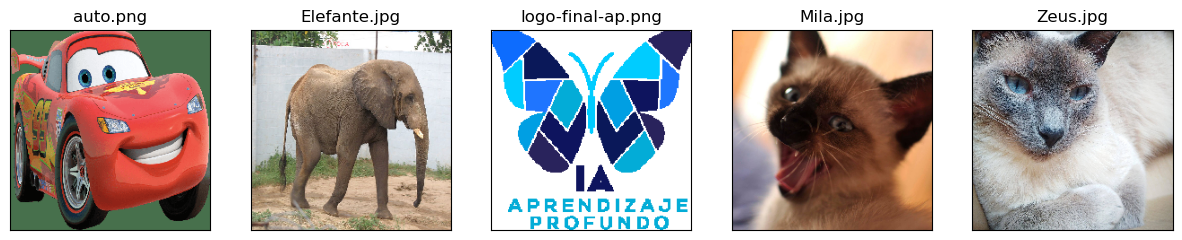

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
#import requests

import tensorflow as tf
from tensorflow import keras as keras
from keras.preprocessing import image

# lista de los nombres de la imágenes
path = '../Imagenes'
imag = ['auto.png', 'Elefante.jpg', 'logo-final-ap.png', 'Mila.jpg', 'Zeus.jpg']
images = [os.path.join(path, i) for i in imag]

# despliega las imágnes de ejemplo
fig, axs = plt.subplots(1, 5,figsize=(15,15))
for i in range(len(imag)):
    axs[i].imshow(image.load_img(images[i], target_size=(224, 224)))
    axs[i].set_title(imag[i])
    axs[i].axes.xaxis.set_visible(False)
    axs[i].axes.yaxis.set_visible(False)
plt.show()

### <span style="color:#4CC9F0">Predicciones</span>

In [ ]:
# arreglo para cargar las imágenes
x = np.zeros(shape = (len(images), 224, 224, 3), dtype= np.float32)

# carga y preprocesa las imágenes
for i in range(len(images)):
    img = image.load_img(images[i], target_size=(224, 224))
    w = image.img_to_array(img)
    w = np.expand_dims(w, axis=0)
    w = preprocess_input(w)
    x[i] = w

# predicciones
preds = model.predict(x)

print('Predichos:')
for i in range(len(images)):
    print(decode_predictions(preds, top=3)[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
Predichos:
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
[('n04285008', 'sports_car', 0.16589677), ('n03930630', 'pickup', 0.14880693), ('n02974003', 'car_wheel', 0.102931544)]
[('n02504458', 'African_elephant', 0.69236624), ('n01871265', 'tusker', 0.19907542), ('n02504013', 'Indian_elephant', 0.10854925)]
[('n03929660', 'pick', 0.14491567), ('n02807133', 'bathing_cap', 0.064902484), ('n03291819', 'envelope', 0.06474293)]
[('n02123597', 'Siamese_cat', 0.99943405), ('n02127052', 'lynx', 0.00028969377), ('n02124075', 'Egyptian_cat', 0.00015814314)]
[('n02123597', 'Siamese_cat', 0.6936908), ('n01877812', 'wallaby', 0.20825493), ('n01882714', 'koala', 0.04558518)]


# <span style="color:#4361EE">Transferencia de conocimiento</span>

La transferencia de conocimiento (Transfer Learning) es un problema que se centra en almacenar el conocimiento adquirido mientras se resuelve un problema y se aplica a un problema diferente pero relacionado

## <span style="color:#4CC9F0">Pasos para entrenar el modelo con transferencia de conocimiento</span>

La idea básica de la transferencia de conocimiento es la siguiente:

1. Se inicia cargando un modelo pre-entrenado disponible. No debe incluirse la capa superior, es decir la última capa (top layer). 
1. Suben al modelo los pesos de algún checkpoint.  En Keras es posible hacerlo en el paso 1, pero es posible hacerlo con un checkpoint diferente. Por ejemplo pesos que usted tiene de un entrenamiento previo.
2. Se agregan al final nuevas capas, terminando con la capa final que debe corresponder al nuevo problema.
3. Se congelan (declaran como no entrenables) las capas del modelo pre-entrenado.
4. Se entrena el modelo. Como se han congelado las capa de la parte pre-entrenada, solamente se entrenarán las nuevas capas.
5. Se hace opcionalmente un ajuste fino. En este paso se liberan algunas capas del modelo pre-entrenando y se entrena de ahí en adelante hasta el final.

# <span style="color:blue">Interpretabilidad</span>

Una de las grandes quejas de los usuario de las reds neuronales es que son modelos de caja negra (black box). La interpretabilidad de las redes neuronales es un área de actual investigación. Sin embargo, para el caso de las redes neuronales **ver lo que pasa dentro de la red, es bastante ilustrativo y un avance importante en interpretabilidad. Los inivtamos a explorar OpenAI Microscope.

Vamos ahora a jugar. 
[OpenAI Microscope](https://openai.com/index/microscope/)

<figure>
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="right"/> 
</figure>